In [2]:
import os, warnings, pdb
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt

In [3]:
import fitsio
import seaborn as sns
from astropy.io import fits
from astropy.table import Table

In [16]:
import legacyhalos.io
import legacyhalos.misc
from legacyhalos.misc import lambda2mhalo, statsinbins
from matplotlib.ticker import FormatStrFormatter, MultipleLocator

In [5]:
sns, colors = legacyhalos.misc.plot_style(paper=True)
%matplotlib inline

In [18]:
def lambda2mhalo(richness, redshift=0.3, Saro=False):
    """
    Convert cluster richness, lambda, to halo mass, given various 
    calibrations.
    
      * Saro et al. 2015: Equation (7) and Table 2 gives M(500).
      * Melchior et al. 2017: Equation (51) and Table 4 gives M(200).
      * Simet et al. 2017: 
    
    Other SDSS-based calibrations: Li et al. 2016; Miyatake et al. 2016; 
    Farahi et al. 2016; Baxter et al. 2016.

    TODO: Return the variance!

    """
    if Saro:
        pass
    
    # Melchior et al. 2017 (default)
    logM0, Flam, Gz, lam0, z0 = 14.371, 1.12, 0.18, 30.0, 0.5
    Mhalo = 10**logM0 * (richness / lam0)**Flam * ( (1 + redshift) / (1 + z0) )**Gz
    
    return Mhalo

In [19]:
# first let us look at richness vs redshift for the profiles
profiles = legacyhalos.io.read_profiles_sample(verbose = True)

Read galaxy indices 0 through 14695 (N=14695) from /home/desi/legacyhalos/science/profiles/data/sample-profiles-centrals-dr8.fits
Temporary hack to use SDSS coordinates!


In [20]:
## okay so here we go 
def qa_legacyhalos_sample(png=None):
    fig, ax = plt.subplots(figsize=(8, 6))

    hb = ax.hexbin(profiles['Z_LAMBDA'], np.log10(profiles['LAMBDA_CHISQ']), mincnt=3,
                   cmap=plt.cm.get_cmap('RdYlBu'), alpha=0.5, bins='log')
    ax.set_xlabel('Redshift $z$')
    ax.set_ylabel(r'$\log_{10}$ (Richness $\lambda$)')
    ax.set_xlim(0, 0.6)
    ymin, ymax = np.log10(3), 2.1
    ax.set_ylim(ymin, ymax)
    ax.axhline(y=np.log10(5), ls='--', color='k')

    cax = fig.add_axes([0.1, 1.05, 0.8, 0.05])
    cb = plt.colorbar(hb, orientation='horizontal', cax=cax)
    cb.set_label(r'$\log_{10}$ (Number of Galaxies)')       

    ax2 = ax.twinx()
    ax2.set_ylabel(r'$\log_{10}\, (\mathcal{M}_{200}\, /\, \mathcal{M}_{\odot})$ at $z=0.3$')
    ax2.set_ylim( np.log10(lambda2mhalo(10**ymin, redshift=0.3)), 
                 np.log10(lambda2mhalo(10**ymax, redshift=0.3)) )
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))    
    ax2.plot([],[])    
    
    if png:
        plt.savefig(png, bbox_inches='tight')

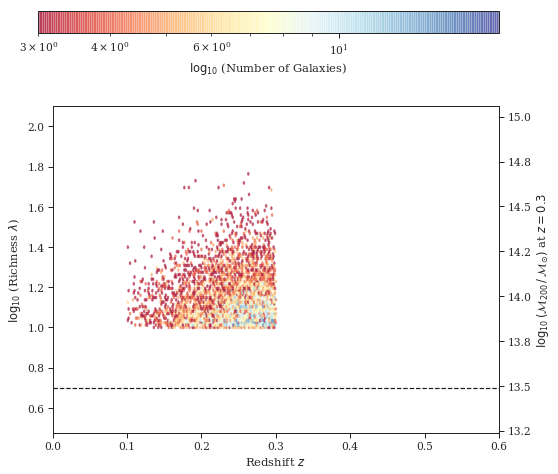

In [21]:
qa_legacyhalos_sample(png='example')

In [22]:
# let's try for the whole sample
full = legacyhalos.io.read_sample(verbose=True)

Read galaxy indices 0 through 293066 (N=293066) from /home/desi/legacyhalos/sample/legacyhalos-centrals-dr6-dr7.fits


In [23]:
def qa_legacyhalos_sample(png=None):
    fig, ax = plt.subplots(figsize=(8, 6))

    hb = ax.hexbin(full['Z_LAMBDA'], np.log10(full['LAMBDA_CHISQ']), mincnt=3,
                   cmap=plt.cm.get_cmap('RdYlBu'), alpha=0.5, bins='log')
    ax.set_xlabel('Redshift $z$')
    ax.set_ylabel(r'$\log_{10}$ (Richness $\lambda$)')
    ax.set_xlim(0, 0.60)
    ymin, ymax = np.log10(3), 2.1
    ax.set_ylim(ymin, ymax)
    ax.axhline(y=np.log10(5), ls='--', color='k')

    cax = fig.add_axes([0.1, 1.05, 0.8, 0.05])
    cb = plt.colorbar(hb, orientation='horizontal', cax=cax)
    cb.set_label(r'$\log_{10}$ (Number of Galaxies)')       

    ax2 = ax.twinx()
    ax2.set_ylabel(r'$\log_{10}\, (\mathcal{M}_{200}\, /\, \mathcal{M}_{\odot})$ at $z=0.3$')
    ax2.set_ylim( np.log10(lambda2mhalo(10**ymin, redshift=0.3)), 
                 np.log10(lambda2mhalo(10**ymax, redshift=0.3)) )
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))    
    ax2.plot([],[])    
    
    if png:
        plt.savefig(png, bbox_inches='tight')

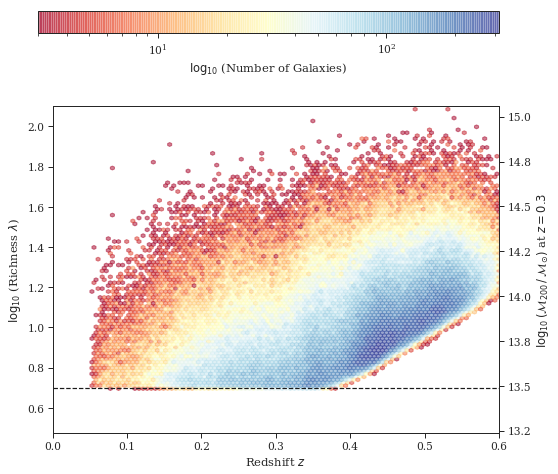

In [24]:
qa_legacyhalos_sample(png='example')

In [ ]:
# plotting Z_lambda for the profiles 
